<a href="https://colab.research.google.com/github/Joykareko/Deep-Learning-Projects/blob/main/Getting_started_with_Deeplearning_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [3]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

In [4]:
print(features)
print(weights)
print(bias)

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
tensor([[0.3177]])


### Remember that for matrix multiplications, the number of columns in the first tensor must equal to the number of rows in the second column. 

In [11]:
x = features*weights
x

tensor([[ 0.1314, -0.2796,  1.1668, -0.1540, -2.8442]])

In [12]:
x = x.sum()
x

tensor(-1.9796)

In [13]:
x = x+bias
x

tensor([[-1.6619]])

In [14]:
x = activation(x)
x

tensor([[0.1595]])

In [5]:
y = activation((features*weights).sum()+bias)
y

tensor([[0.1595]])

In [16]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [18]:
print(features)
print(n_input,n_hidden,n_output)

tensor([[-0.1468,  0.7861,  0.9468]])
3 2 1


In [19]:
y = activation((torch.mm(features,W1))+B1)
y = activation ((torch.mm(y,W2))+B2)
y

tensor([[0.3171]])

In [20]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [21]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)), #normalize mean 0.5,sd,0.5
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #64 images

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [22]:
dataiter = iter(trainloader)
images, labels = dataiter.next() #iter() followed by next() is used just to get some images and display them in the notebook
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


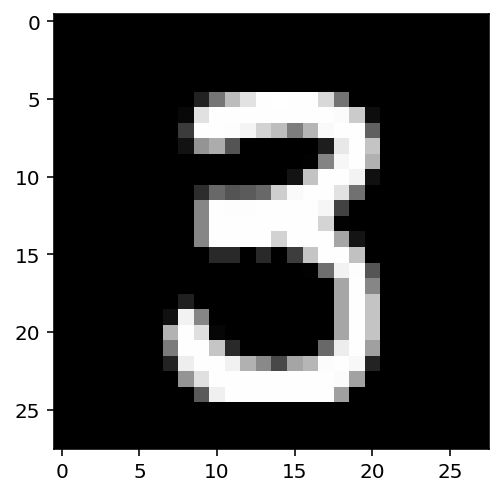

In [26]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [28]:
def activation(x):
    return 1/(1+torch.exp(x))

inputs = images.view(64,784)
inputs.shape

w1 = torch.randn(784,256)
w2 = torch.randn(256,10)

b1 = torch.randn(256)
b2 = torch.randn(10)

h = activation(torch.mm(inputs,w1)+b1)


out = activation(torch.mm(h,w2)+b2) # output of your network, should have shape (64,10)

In [30]:
print(out.shape)

torch.Size([64, 10])


In [42]:
def softmax(x):
    ## TODO: Implement the softmax function here
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)
# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [43]:
from torch import nn

In [44]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [45]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [46]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x